# Problem Statement:
## Pick up the following stocks and generate forecasts accordingly Stocks:
1. NASDAQ.AAPL
2. NASDAQ.ADP
3. NASDAQ.CBOE
4. NASDAQ.CSCO
5. NASDAQ.EBAY

In [1]:
#Importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# libraries for Time series model
from pandas.tools.plotting import autocorrelation_plot  # for autocorrelation plot
from statsmodels.graphics.tsaplots import plot_pacf

# ARIMA model libraries
from statsmodels.tsa.arima_model import ARIMA, ARMAResults

# for date time conversion
import datetime

import sys

# for interactive potting
import seaborn as sns

# for stats model 
import statsmodels
import statsmodels.stats.diagnostic as diag
from statsmodels.tsa.stattools import adfuller
from scipy.stats.mstats import normaltest

#visualization
from matplotlib.pyplot import acorr
plt.style.use('fivethirtyeight')
%matplotlib inline

C:\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [3]:
#import dataset
df = pd.read_csv('data_stocks.csv')

,DATE,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,...,NYSE.WYN,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS
0,1491226200,2363.6101,42.3300,143.6800,129.6300,82.040,102.2300,85.2200,59.760,121.520,...,84.3700,119.035,44.40,39.88,82.0300,7.360,50.22,63.86,122.000,53.350
1,1491226260,2364.1001,42.3600,143.7000,130.3200,82.080,102.1400,85.6500,59.840,121.480,...,84.3700,119.035,44.11,39.88,82.0300,7.380,50.22,63.74,121.770,53.350
2,1491226320,2362.6799,42.3100,143.6901,130.2250,82.030,102.2125,85.5100,59.795,121.930,...,84.5850,119.260,44.09,39.98,82.0200,7.360,50.12,63.75,121.700,53.365
3,1491226380,2364.3101,42.3700,143.6400,130.0729,82.000,102.1400,85.4872,59.620,121.440,...,84.4600,119.260,44.25,39.99,82.0200,7.350,50.16,63.88,121.700,53.380
4,1491226440,2364.8501,42.5378,143.6600,129.8800,82.035,102.0600,85.7001,59.620,121.600,...,84.4700,119.610,44.11,39.96,82.0300,7.360,50.20,63.91,121.695,53.240
5,1491226500,2365.6201,42.5399,143.7800,130.0700,82.040,102.0400,85.9200,59.610,121.700,...,84.4825,119.580,44.15,39.96,82.0300,7.360,50.20,63.84,121.850,53.220
6,1491226560,2365.2000,42.4700,143.8640,130.1800,82.120,102.3300,85.9120,59.540,121.630,...,84.5000,119.320,44.20,39.98,82.0566,7.365,50.33,63.83,122.100,53.330
7,1491226620,2365.2900,42.4700,143.8100,130.1400,82.190,102.3700,85.8200,59.410,121.610,...,84.5200,119.110,44.12,39.95,82.0000,7.360,50.30,63.83,122.280,53.370
8,1491226680,2364.3201,42.3900,143.8150,130.1000,82.230,102.3800,85.8800,59.430,121.715,...,84.4800,119.310,44.12,39.93,81.9500,7.370,50.25,63.85,121.875,53.330
9,1491226740,2364.6399,42.3300,143.8000,130.2100,82.165,102.3300,85.8600,59.260,121.850,...,84.4000,119.150,44.17,39.86,81.9000,7.365,50.22,63.84,121.930,53.400


In [4]:
df.head()

,DATE,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,...,NYSE.WYN,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS
0,1491226200,2363.6101,42.3300,143.6800,129.6300,82.040,102.2300,85.2200,59.760,121.52,...,84.370,119.035,44.40,39.88,82.03,7.36,50.22,63.86,122.000,53.350
1,1491226260,2364.1001,42.3600,143.7000,130.3200,82.080,102.1400,85.6500,59.840,121.48,...,84.370,119.035,44.11,39.88,82.03,7.38,50.22,63.74,121.770,53.350
2,1491226320,2362.6799,42.3100,143.6901,130.2250,82.030,102.2125,85.5100,59.795,121.93,...,84.585,119.260,44.09,39.98,82.02,7.36,50.12,63.75,121.700,53.365
3,1491226380,2364.3101,42.3700,143.6400,130.0729,82.000,102.1400,85.4872,59.620,121.44,...,84.460,119.260,44.25,39.99,82.02,7.35,50.16,63.88,121.700,53.380
4,1491226440,2364.8501,42.5378,143.6600,129.8800,82.035,102.0600,85.7001,59.620,121.60,...,84.470,119.610,44.11,39.96,82.03,7.36,50.20,63.91,121.695,53.240


In [5]:
df.tail()

,DATE,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,...,NYSE.WYN,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS
41261,1504209360,2472.22,44.72,164.11,155.090,83.67,106.565,114.49,47.150,142.425,...,99.675,99.53,49.485,40.955,76.360,32.285,62.110,76.88,114.31,62.7250
41262,1504209420,2471.77,44.73,164.12,155.160,83.65,106.590,114.52,47.150,142.450,...,99.730,99.63,49.480,40.960,76.370,32.295,62.100,76.90,114.33,62.7100
41263,1504209480,2470.03,44.74,164.01,155.065,83.62,106.520,114.47,47.150,142.330,...,99.735,99.64,49.495,40.940,76.315,32.290,62.090,76.88,114.31,62.6850
41264,1504209540,2471.49,44.71,163.88,154.960,83.58,106.400,114.33,47.135,142.170,...,99.700,99.63,49.485,40.925,76.300,32.275,62.075,76.83,114.23,62.6301
41265,1504209600,2471.49,44.74,163.98,155.160,83.69,106.470,114.46,47.150,142.410,...,99.670,99.64,49.490,40.940,76.320,32.270,62.070,76.81,114.28,62.6800


In [6]:
#shape of the data
df.shape

(41266, 502)

In [7]:
#taking log of the column 
df['log_AAPL']=np.log(df['NASDAQ.AAPL'])

In [8]:
df.shape

(41266, 503)

In [9]:
df['NASDAQ.AAPL'].head()

0    143.6800
1    143.7000
2    143.6901
3    143.6400
4    143.6600
Name: NASDAQ.AAPL, dtype: float64

In [10]:
df['log_AAPL'].head()

0    4.967589
1    4.967728
2    4.967659
3    4.967310
4    4.967449
Name: log_AAPL, dtype: float64

In [11]:
#datatype of the columns
df.dtypes

DATE              int64
SP500           float64
NASDAQ.AAL      float64
NASDAQ.AAPL     float64
NASDAQ.ADBE     float64
NASDAQ.ADI      float64
NASDAQ.ADP      float64
NASDAQ.ADSK     float64
NASDAQ.AKAM     float64
NASDAQ.ALXN     float64
NASDAQ.AMAT     float64
NASDAQ.AMD      float64
NASDAQ.AMGN     float64
NASDAQ.AMZN     float64
NASDAQ.ATVI     float64
NASDAQ.AVGO     float64
NASDAQ.BBBY     float64
NASDAQ.BIIB     float64
NASDAQ.CA       float64
NASDAQ.CBOE     float64
NASDAQ.CELG     float64
NASDAQ.CERN     float64
NASDAQ.CHRW     float64
NASDAQ.CHTR     float64
NASDAQ.CINF     float64
NASDAQ.CMCSA    float64
NASDAQ.CME      float64
NASDAQ.COST     float64
NASDAQ.CSCO     float64
NASDAQ.CSX      float64
                 ...   
NYSE.UTX        float64
NYSE.V          float64
NYSE.VAR        float64
NYSE.VFC        float64
NYSE.VLO        float64
NYSE.VMC        float64
NYSE.VNO        float64
NYSE.VTR        float64
NYSE.VZ         float64
NYSE.WAT        float64
NYSE.WEC        

In [12]:
# import datetime for date time conversion
from datetime import datetime

In [13]:
# datetime conversion and created a new column NDATE
df['NDATE']=pd.to_datetime(df['DATE'],unit='s')

In [14]:
df.head()

,DATE,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,...,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS,log_AAPL,NDATE
0,1491226200,2363.6101,42.3300,143.6800,129.6300,82.040,102.2300,85.2200,59.760,121.52,...,44.40,39.88,82.03,7.36,50.22,63.86,122.000,53.350,4.967589,2017-04-03 13:30:00
1,1491226260,2364.1001,42.3600,143.7000,130.3200,82.080,102.1400,85.6500,59.840,121.48,...,44.11,39.88,82.03,7.38,50.22,63.74,121.770,53.350,4.967728,2017-04-03 13:31:00
2,1491226320,2362.6799,42.3100,143.6901,130.2250,82.030,102.2125,85.5100,59.795,121.93,...,44.09,39.98,82.02,7.36,50.12,63.75,121.700,53.365,4.967659,2017-04-03 13:32:00
3,1491226380,2364.3101,42.3700,143.6400,130.0729,82.000,102.1400,85.4872,59.620,121.44,...,44.25,39.99,82.02,7.35,50.16,63.88,121.700,53.380,4.967310,2017-04-03 13:33:00
4,1491226440,2364.8501,42.5378,143.6600,129.8800,82.035,102.0600,85.7001,59.620,121.60,...,44.11,39.96,82.03,7.36,50.20,63.91,121.695,53.240,4.967449,2017-04-03 13:34:00


In [15]:
df.shape

(41266, 504)

## 1. NASDAQ.AAPL

In [16]:
#df['new']=df['DATE'].apply(lambda x: datetime.datetime.fromtimestamp(x).strftime("%Y-%m-%d %H:%M:%S")

In [17]:
# Durbin_watson test is used to check the presence of Autocorrelation in residuals in regression analysis.
#The Durbin-Watson statistic is always between 0 and 4.
#A value of 2 means that there is no autocorrelation in the sample. 
#Values from 0 to less than 2 indicate positive autocorrelation and values from more than 2 to 4 indicate negative autocorrelation.

import statsmodels.api as sm
sm.stats.durbin_watson(df['log_AAPL'])

1.5195875753588083e-08

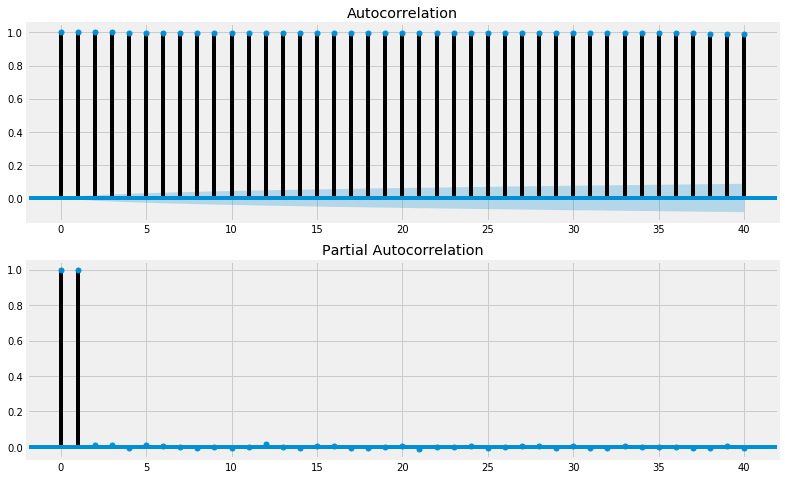

In [18]:
# show plots in the notebook

%matplotlib inline
fig = plt.figure(figsize=(12,8))

# for Auto-correlation plot
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['log_AAPL'].values.squeeze(), lags=40, ax=ax1)

#for partial Auto-correlation plot
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['log_AAPL'], lags=40, ax=ax2)


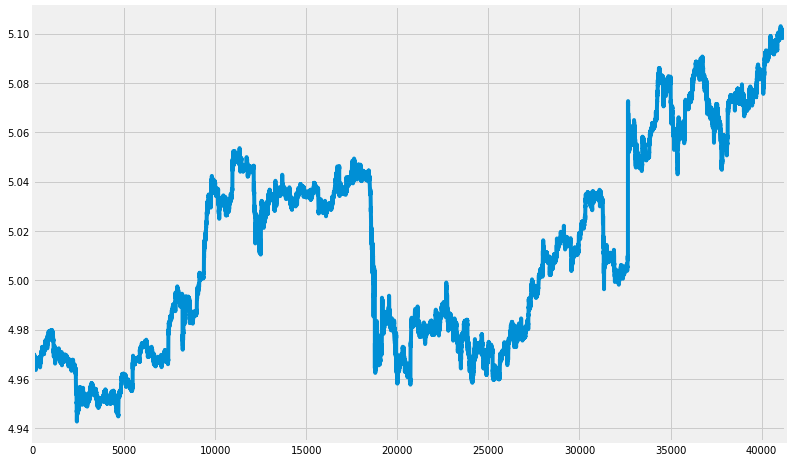

In [19]:
#Line plot of log_AAPL

%matplotlib inline
df['log_AAPL'].plot(figsize=(12,8));

In [20]:
# creating a matrix after dropping nulls
AAPL_array=df["log_AAPL"].dropna().as_matrix() 

In [21]:
# Create ARIMA model
model = ARIMA(AAPL_array, (2,2,1)).fit()


C:\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
C:\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):


In [22]:
print(model.params)

[-1.46943465e-09 -2.15706756e-02 -2.60067096e-02 -9.68668703e-01]


In [23]:
# printing parameters AIC,BIC and HQIC
print(model.aic,model.bic,model.hqic)

-492060.6927971314 -492017.5540684908 -492047.0581161025


C:\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


In [24]:
best_values=[0,0,0]

In [25]:
best_values

[0, 0, 0]

In [26]:
best_aic=1e20

In [27]:
try:
    for p in range(3):
        for d in range(3):
            for q in range(3):
                model=ARIMA(AAPL_array, (p,d,q)).fit()
                if model.aic < best_aic:
                    best_values=[p,d,q]
except:
    pass

C:\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1364: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
C:\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1367: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]
C:\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1373: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which

In [28]:
print(best_values)

[0, 2, 1]


In [29]:
AAPL_pred=model.predict()

C:\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


In [30]:
AAPL_pred

array([-3.46675404e-09,  1.04036940e-04,  2.55908799e-04, ...,
       -5.28469409e-05,  6.77730125e-04,  7.99244481e-04])

In [31]:
len(AAPL_pred)

41264

In [32]:
from sklearn.metrics import mean_squared_error

In [33]:
print(mean_squared_error(df['log_AAPL'][2:],AAPL_pred))

25.129928997115886


### ARIMA model without log transformation

In [34]:
df = pd.read_csv('data_stocks.csv')

In [35]:
df.head()

,DATE,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,...,NYSE.WYN,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS
0,1491226200,2363.6101,42.3300,143.6800,129.6300,82.040,102.2300,85.2200,59.760,121.52,...,84.370,119.035,44.40,39.88,82.03,7.36,50.22,63.86,122.000,53.350
1,1491226260,2364.1001,42.3600,143.7000,130.3200,82.080,102.1400,85.6500,59.840,121.48,...,84.370,119.035,44.11,39.88,82.03,7.38,50.22,63.74,121.770,53.350
2,1491226320,2362.6799,42.3100,143.6901,130.2250,82.030,102.2125,85.5100,59.795,121.93,...,84.585,119.260,44.09,39.98,82.02,7.36,50.12,63.75,121.700,53.365
3,1491226380,2364.3101,42.3700,143.6400,130.0729,82.000,102.1400,85.4872,59.620,121.44,...,84.460,119.260,44.25,39.99,82.02,7.35,50.16,63.88,121.700,53.380
4,1491226440,2364.8501,42.5378,143.6600,129.8800,82.035,102.0600,85.7001,59.620,121.60,...,84.470,119.610,44.11,39.96,82.03,7.36,50.20,63.91,121.695,53.240


In [36]:
df['new_date']=df['DATE'].apply(lambda x: datetime.fromtimestamp(x).strftime("%Y-%m-%d %H:%M:%S"))

In [37]:
sm.stats.durbin_watson(df['NASDAQ.AAPL'])

3.859214208142229e-07

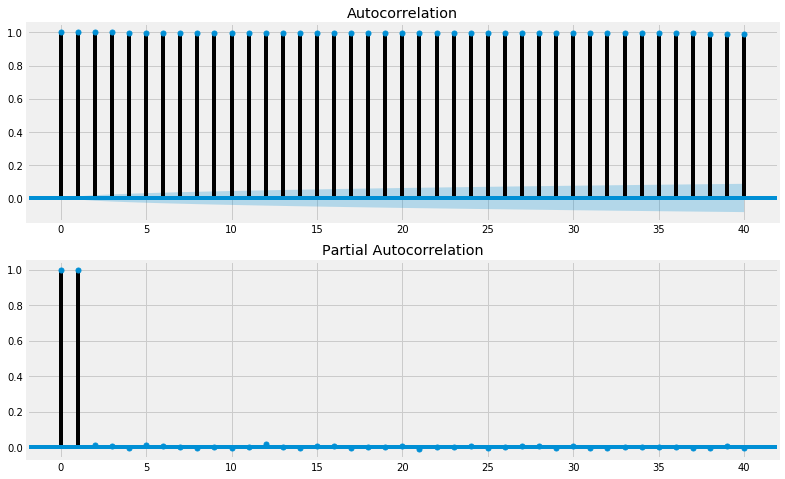

In [38]:
# show plots in the notebook
%matplotlib inline
fig = plt.figure(figsize=(12,8))

#auto-correlation plot
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['NASDAQ.AAPL'].values.squeeze(), lags=40, ax=ax1)

# partial auto-correlation plot
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['NASDAQ.AAPL'], lags=40, ax=ax2)

In [39]:
# creating array for ARIMA modelling
AAPL_array=df["NASDAQ.AAPL"].dropna().as_matrix()

# ARIMA model
model_arima = ARIMA(AAPL_array, (2,2,2)).fit()

#printing parameters
print(model_arima.params)

C:\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
C:\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):


[ 2.33340519e-08 -7.61126089e-01 -2.21968555e-02 -2.54734979e-01
 -7.42133771e-01]


In [40]:
# Using ARMA model
model_arma = sm.tsa.ARMA(AAPL_array, (2,2)).fit()
print(model_arma.params)

C:\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
C:\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):


[ 1.51785578e+02  3.92414157e-01  6.07467970e-01  5.97419915e-01
 -2.29686935e-02]


### Here we get error which is proof that data is not stationary. we can't use ARMA model for non stationary data.

In [41]:
# Printing best values for AIC parameters
try:
    for p in range(3):
        for d in range(3):
            for q in range(3):
                model_arima=ARIMA(AAPL_array, (p,d,q)).fit()
                if model.aic < best_aic:
                    best_values=[p,d,q]
except:
    pass

C:\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1364: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
C:\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1367: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]
C:\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1373: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which

In [42]:
best_values

[0, 2, 1]

### using (1,2,1) as parameters for arima model

In [43]:
model_arima121 = ARIMA(AAPL_array, (1,2,1)).fit()
print(model_arima121.params)

C:\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
C:\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):


[ 3.73499377e-08 -1.09204743e-02 -9.99532914e-01]


C:\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [45]:
print(model_arima121.aic,model_arima121.bic,model_arima121.hqic)

-78408.84070458247 -78374.32972166999 -78397.9329597593


In [46]:
prediction=model_arima121.predict()

C:\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


In [47]:
prediction

array([ 3.73499377e-08,  1.51133157e-02,  3.71808321e-02, ...,
       -8.55373947e-03,  1.12704700e-01,  1.32861163e-01])

In [48]:
len(prediction)

41264

### Analyzing the residuals

In [49]:
from scipy import stats


resid = model_arima121.resid
#stats.normaltest(model_arima121)

C:\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


In [50]:
resid

array([-0.02990004, -0.05531332,  0.03291917, ..., -0.11144626,
       -0.1327047 ,  0.09713884])

In [51]:
# ## becuase I changed the dataframe to array it thorws an error

C:\Anaconda3\lib\site-packages\scipy\stats\stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


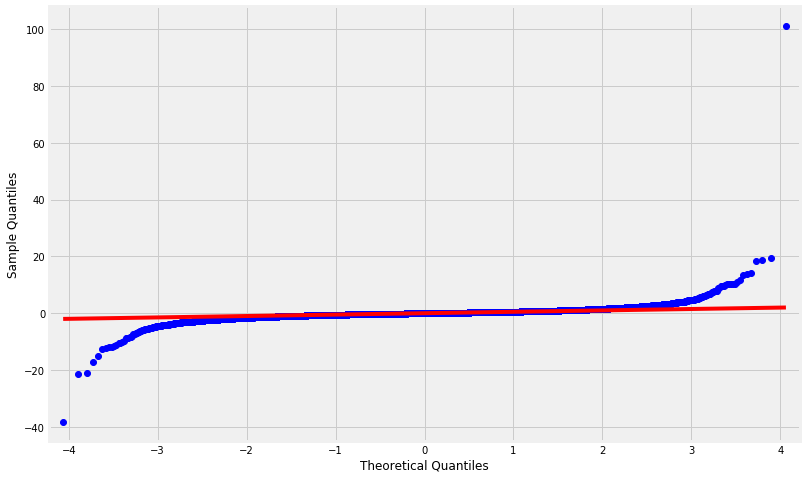

In [52]:
from statsmodels.graphics.api import qqplot
# show plots in the notebook
%matplotlib inline
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
fig = qqplot(resid, line='q', ax=ax, fit=True)

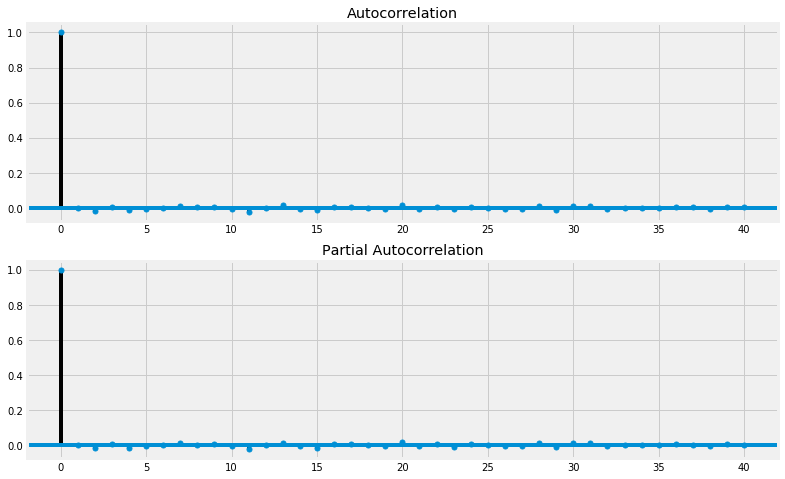

In [53]:
%matplotlib inline
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(resid.squeeze(), lags=40, ax=ax1) #### resid.values.sqeeze() throws an error
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(resid, lags=40, ax=ax2)

In [54]:
# create a function to calculate MFE and MAE


def mean_forecast_err(y, yhat):
    return y.sub(yhat).mean()

def mean_absolute_err(y, yhat):
    return np.mean((np.abs(y.sub(yhat).mean()) / yhat)) # or percent error = * 100

In [55]:
#print("MFE = ", mean_forecast_err(AAPL_array[2:], prediction))
#print("MAE = ", mean_absolute_err(AAPL_array[2:], prediction))

## 2.NASDAQ.ADP

In [56]:
ADP=df['NASDAQ.ADP']


In [57]:
ADP.dtype

dtype('float64')

In [58]:
df.isnull().sum()

DATE            0
SP500           0
NASDAQ.AAL      0
NASDAQ.AAPL     0
NASDAQ.ADBE     0
NASDAQ.ADI      0
NASDAQ.ADP      0
NASDAQ.ADSK     0
NASDAQ.AKAM     0
NASDAQ.ALXN     0
NASDAQ.AMAT     0
NASDAQ.AMD      0
NASDAQ.AMGN     0
NASDAQ.AMZN     0
NASDAQ.ATVI     0
NASDAQ.AVGO     0
NASDAQ.BBBY     0
NASDAQ.BIIB     0
NASDAQ.CA       0
NASDAQ.CBOE     0
NASDAQ.CELG     0
NASDAQ.CERN     0
NASDAQ.CHRW     0
NASDAQ.CHTR     0
NASDAQ.CINF     0
NASDAQ.CMCSA    0
NASDAQ.CME      0
NASDAQ.COST     0
NASDAQ.CSCO     0
NASDAQ.CSX      0
               ..
NYSE.UTX        0
NYSE.V          0
NYSE.VAR        0
NYSE.VFC        0
NYSE.VLO        0
NYSE.VMC        0
NYSE.VNO        0
NYSE.VTR        0
NYSE.VZ         0
NYSE.WAT        0
NYSE.WEC        0
NYSE.WFC        0
NYSE.WHR        0
NYSE.WM         0
NYSE.WMB        0
NYSE.WMT        0
NYSE.WRK        0
NYSE.WU         0
NYSE.WY         0
NYSE.WYN        0
NYSE.XEC        0
NYSE.XEL        0
NYSE.XL         0
NYSE.XOM        0
NYSE.XRX  

In [59]:
 # convert pandas column into matrix to use in ARIMA model
ADP_array=df["NASDAQ.ADP"].dropna().as_matrix()


In [60]:
#ARIMA model
model_ADP = ARIMA(ADP_array, (2,2,1)).fit()


C:\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
C:\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):


In [61]:
#When i passes 2 as q it shows invertibility error value error

In [62]:
pred_adp=model_ADP.predict()

C:\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


In [63]:
print(model_ADP.aic,model_ADP.bic,model_ADP.hqic)

-97460.95993062625 -97417.82120198564 -97447.3252495973


C:\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


In [64]:
# We see all the above three model metrics are almost equal.

In [65]:
pred_adp

array([ 8.47206776e-08, -7.48689164e-02,  3.49577506e-02, ...,
       -2.12247819e-02,  6.60713791e-02,  1.15249216e-01])

In [66]:
#df2.index = pd.Index(sm.tsa.datetools.dates_from_range('1700', '2008'))


In [67]:
df2=df.copy()

In [68]:
df2.head()

,DATE,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,...,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS,new_date
0,1491226200,2363.6101,42.3300,143.6800,129.6300,82.040,102.2300,85.2200,59.760,121.52,...,119.035,44.40,39.88,82.03,7.36,50.22,63.86,122.000,53.350,2017-04-03 19:00:00
1,1491226260,2364.1001,42.3600,143.7000,130.3200,82.080,102.1400,85.6500,59.840,121.48,...,119.035,44.11,39.88,82.03,7.38,50.22,63.74,121.770,53.350,2017-04-03 19:01:00
2,1491226320,2362.6799,42.3100,143.6901,130.2250,82.030,102.2125,85.5100,59.795,121.93,...,119.260,44.09,39.98,82.02,7.36,50.12,63.75,121.700,53.365,2017-04-03 19:02:00
3,1491226380,2364.3101,42.3700,143.6400,130.0729,82.000,102.1400,85.4872,59.620,121.44,...,119.260,44.25,39.99,82.02,7.35,50.16,63.88,121.700,53.380,2017-04-03 19:03:00
4,1491226440,2364.8501,42.5378,143.6600,129.8800,82.035,102.0600,85.7001,59.620,121.60,...,119.610,44.11,39.96,82.03,7.36,50.20,63.91,121.695,53.240,2017-04-03 19:04:00


In [69]:
df2.tail()

,DATE,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,...,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS,new_date
41261,1504209360,2472.22,44.72,164.11,155.090,83.67,106.565,114.49,47.150,142.425,...,99.53,49.485,40.955,76.360,32.285,62.110,76.88,114.31,62.7250,2017-09-01 01:26:00
41262,1504209420,2471.77,44.73,164.12,155.160,83.65,106.590,114.52,47.150,142.450,...,99.63,49.480,40.960,76.370,32.295,62.100,76.90,114.33,62.7100,2017-09-01 01:27:00
41263,1504209480,2470.03,44.74,164.01,155.065,83.62,106.520,114.47,47.150,142.330,...,99.64,49.495,40.940,76.315,32.290,62.090,76.88,114.31,62.6850,2017-09-01 01:28:00
41264,1504209540,2471.49,44.71,163.88,154.960,83.58,106.400,114.33,47.135,142.170,...,99.63,49.485,40.925,76.300,32.275,62.075,76.83,114.23,62.6301,2017-09-01 01:29:00
41265,1504209600,2471.49,44.74,163.98,155.160,83.69,106.470,114.46,47.150,142.410,...,99.64,49.490,40.940,76.320,32.270,62.070,76.81,114.28,62.6800,2017-09-01 01:30:00


In [70]:
df2 = pd.read_csv('data_stocks.csv')

In [71]:
df2.head()

,DATE,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,...,NYSE.WYN,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS
0,1491226200,2363.6101,42.3300,143.6800,129.6300,82.040,102.2300,85.2200,59.760,121.52,...,84.370,119.035,44.40,39.88,82.03,7.36,50.22,63.86,122.000,53.350
1,1491226260,2364.1001,42.3600,143.7000,130.3200,82.080,102.1400,85.6500,59.840,121.48,...,84.370,119.035,44.11,39.88,82.03,7.38,50.22,63.74,121.770,53.350
2,1491226320,2362.6799,42.3100,143.6901,130.2250,82.030,102.2125,85.5100,59.795,121.93,...,84.585,119.260,44.09,39.98,82.02,7.36,50.12,63.75,121.700,53.365
3,1491226380,2364.3101,42.3700,143.6400,130.0729,82.000,102.1400,85.4872,59.620,121.44,...,84.460,119.260,44.25,39.99,82.02,7.35,50.16,63.88,121.700,53.380
4,1491226440,2364.8501,42.5378,143.6600,129.8800,82.035,102.0600,85.7001,59.620,121.60,...,84.470,119.610,44.11,39.96,82.03,7.36,50.20,63.91,121.695,53.240


In [72]:
df2['new_d']=df2['DATE'].apply(lambda x: datetime.fromtimestamp(x).strftime("%Y-%m-%d"))

In [73]:
df2.index


RangeIndex(start=0, stop=41266, step=1)

##  3.NASDAQ.CBOE

In [74]:
#log transformation
df['log_CBoE']=np.log(df['NASDAQ.CBOE'])

# creating matrix
CBoE_array=df["log_CBoE"].dropna().as_matrix()

# residuals
df['diff_log_CBoE']= df["log_CBoE"]-df["log_CBoE"].shift(periods=-1)

#Building model
model_CBoE = ARIMA(CBoE_array, (2,2,1)).fit()

# prediction
predCBoE=model_CBoE.predict()

C:\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
C:\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):
C:\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will 

In [75]:
print(model_CBoE.aic)
print(model_CBoE.bic)

-506313.84439545317
-506270.70566681254


C:\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


In [76]:
predCBoE=model_CBoE.predict()

C:\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


In [77]:
rmse_CBoE=np.sqrt(mean_squared_error(df['diff_log_CBoE'][1:-1],predCBoE))

In [78]:
rmse_CBoE


0.0007971976394259396

In [79]:
np.exp(rmse_CBoE)

1.0007975154859206

## 5. NASDAQ.EBAY

In [80]:
df['log_EBAY']=np.log(df['NASDAQ.EBAY'])
Ebay_array=df["log_EBAY"].dropna().as_matrix()
df['diff_log_EBAY']= df["log_EBAY"]-df["log_EBAY"].shift(periods=-1)
model_Ebay = ARIMA(Ebay_array, (2,2,1)).fit()
predEbay=model_Ebay.predict()


C:\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
C:\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):
C:\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


In [81]:
df[df['diff_log_EBAY'].isnull()==True]

,DATE,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,...,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS,new_date,log_CBoE,diff_log_CBoE,log_EBAY,diff_log_EBAY
41265,1504209600,2471.49,44.74,163.98,155.16,83.69,106.47,114.46,47.15,142.41,...,32.27,62.07,76.81,114.28,62.68,2017-09-01 01:30:00,4.614031,NaN,3.587124,NaN


In [82]:
rmse_ebay=np.sqrt(mean_squared_error(df['diff_log_EBAY'][1:-1],predEbay))

In [83]:
rmse_ebay

0.0009745452721052792

In [84]:
np.exp(rmse_ebay)

1.000975020295647

## 4. NASDAQ.CSCO

In [ ]:
from sklearn.metrics import mean_squared_error

df2['CSCO_log']=np.log(df2['NASDAQ.CSCO'])
CSCO_array=df2['CSCO_log'].dropna().as_matrix()

df2['diff_CSCO_log']= df2['CSCO_log']-df2["CSCO_log"].shift(periods=-1) #Here periods=-1 is used beacuse current row is subtracted from next row 

model_CSCO = ARIMA(CSCO_array, (2,2,1)).fit()
df2['diff_CSCO_log'].shape


In [ ]:
rmse=np.sqrt(mean_squared_error(df2['diff_CSCO_log'][1:-1],model_CSCO.predict()))

In [ ]:
rmse

In [ ]:
model_CSCO.aic

In [ ]:
pred_CSCO=model_CSCO.predict()

In [ ]:
pred_CSCO

In [ ]:
rmse_CSCO=np.sqrt(mean_squared_error(df2['diff_CSCO_log'][1:-1],pred_CSCO))

In [ ]:
np.exp(rmse_CSCO)